In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob

In [2]:
DATA = Path('Datasample/10')

In [3]:
csvs = glob(str(DATA)+'/2*/*/*.csv')

In [4]:
#Datasample from oct 2018, Days 20th - 29th

In [5]:
len(csvs), csvs[:5]

(14136,
 ['Datasample/10/24/07/Scadadata_2018-10-24_07-57-00.csv',
  'Datasample/10/24/07/Scadadata_2018-10-24_07-00-00.csv',
  'Datasample/10/24/07/Scadadata_2018-10-24_07-16-00.csv',
  'Datasample/10/24/07/Scadadata_2018-10-24_07-25-00.csv',
  'Datasample/10/24/07/Scadadata_2018-10-24_07-56-00.csv'])

In [6]:
# All hosts

In [7]:
host1 = 'AS01'
host2 = 'AS02'
host3 = 'AS03'
host4 = 'AS04'
host5 = 'AS05'
host6 = 'AS06'
host7 = 'AS07'
host8 = 'AS08'
host9 = 'AS09'
host10 = 'AS10'
host11 = 'AS11'
host12 = 'AS12'
host13 = 'DN_A'
host14 = 'DN_V'

In [8]:
# Method for creating dataframe with content per host, returns df with dropped 12 hour time column

In [9]:
def extract_host(host_name):
    dfs = []
    for csv in csvs:
        current_df = pd.read_csv(csv, sep=';')
        current_df = current_df.loc[current_df.Host == host_name]
        dfs.append(current_df)
    df1 = pd.concat(dfs)
    df = df1.drop(columns=['Time.1'])
    
    return df

In [10]:
# Method for creating dataframe with content per subst

In [11]:
def extract_subs(csv, subs_name):
    dfs = []
    current_df = csv
    current_df = current_df.loc[current_df.Subst == subs_name]
    dfs.append(current_df)
    df = pd.concat(dfs)
    
    return df

In [12]:
# Method for creating dataframe by units

In [13]:
def extract_unit(csv, unit):
    dfs = []
    current_df = csv
    current_df = current_df.loc[current_df.Unit == unit]
    dfs.append(current_df)
    df = pd.concat(dfs)
    
    return df

In [14]:
def extract_tag(csv, prefix):
    dfs = []
    series_tag = csv['Tag']
    current_df = csv
    current_df = current_df.loc[current_df.Tag]
    dfs.append(current_df)
    df = pd.concat(dfs)

In [15]:
df_host1 = extract_host(host1)

In [16]:
df_host1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828740 entries, 65 to 6170
Data columns (total 7 columns):
Tag            object
Time           object
Value          float64
Host           object
Subst          object
Description    object
Unit           object
dtypes: float64(1), object(6)
memory usage: 660.9+ MB


In [17]:
df_host1.head()

,Tag,Time,Value,Host,Subst,Description,Unit
65,1201_8001_00.PD,2018-10-24 07:57:00,20.821,AS01,U2A1,Padrag regulator Laegdene,%
66,1201_8001_01,2018-10-24 07:57:00,29.521,AS01,U2A1,Motorstrom pumpe 1 Laegdene,A
67,1201_8001_01.PD,2018-10-24 07:57:00,83.284,AS01,U2A1,Padrag pumpe 1 Laegdene,%
68,1201_8001_02,2018-10-24 07:57:00,1.369,AS01,U2A1,Motorstrom pumpe 2 Laegdene,A
69,1201_8001_02.PD,2018-10-24 07:57:00,0.000,AS01,U2A1,Padrag pumpe 2 Laegdene,%


In [22]:
df_host1.Unit.unique()

array(['%', 'A', 'kote', 'm', 'Bar', 'm3/t', 'Gr.C', 'mVs', 'Kote', 'kW',
       'kVAr', 'kWh', 'kVA', 'CosF', 'V', 'Amp', 'Hz', 'mm/s', 'VDC',
       'grdC', 'bar', 'rpm', 'sek', 'moh', 'dgc', 'HZ', 'kvar', 'kva',
       'pH', 'grC', 'NTU', 'mg/l', 'Hazen', 'Ph', 'csx', 'gr.C', 'l/sek.',
       'mvs', 'kg', 'Kg', 'kg/t', 'Vol%', 'l/t', 'liter', 'm3', 'mbar',
       'W/m2', 'w/m2', 'noe', 'rndm', 'Ws/m2', 'm/s', 'deg.M', 'mm',
       'mm/t', 'cm', ' ', nan, 'l/s', 'Nm', 'PH', 'Nr', '% H20', 'kw',
       'VOL%', 'g/m3', 'l', 'nn', '%RH', 'HHMM', 'min', 'ant', 'grd'],
      dtype=object)

In [23]:
df_extracted_flow_host1 = extract_unit(df_host1, 'm3/t')

In [24]:
df_extracted_flow_host1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381794 entries, 75 to 6170
Data columns (total 7 columns):
Tag            1381794 non-null object
Time           1381794 non-null object
Value          1381794 non-null float64
Host           1381794 non-null object
Subst          1381794 non-null object
Description    1381794 non-null object
Unit           1381794 non-null object
dtypes: float64(1), object(6)
memory usage: 84.3+ MB


In [25]:
df_extracted_flow_host1.head()

,Tag,Time,Value,Host,Subst,Description,Unit
75,1201_8001_06,2018-10-24 07:57:00,12.688,AS01,U2A1,Vannmengde pumpestasjon Laegdene,m3/t
77,1201_8001_08,2018-10-24 07:57:00,111.828,AS01,U2A1,Vannmengde inn basseng Laegdene,m3/t
78,1201_8001_08.UT,2018-10-24 07:57:00,0.000,AS01,U2A1,Vannmengde ut basseng Laegdene,m3/t
79,1201_8001_09,2018-10-24 07:57:00,91.887,AS01,U2A1,Vannmengde ut basseng Laegdene,m3/t
80,1201_8001_09.INN,2018-10-24 07:57:00,0.000,AS01,U2A1,Vannmengde inn basseng Laegdene,m3/t


In [26]:
# Convert the 'Time' column to datetime64 series

In [27]:
def convert_time_col(csv):
    series_dt64_converted = pd.to_datetime(csv['Time'])
    csv['Time'] = series_dt64_converted
    return csv

In [28]:
df_flow_host1 = convert_time_col(df_extracted_flow_host1)

In [29]:
df_flow_host1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381794 entries, 75 to 6170
Data columns (total 7 columns):
Tag            1381794 non-null object
Time           1381794 non-null datetime64[ns]
Value          1381794 non-null float64
Host           1381794 non-null object
Subst          1381794 non-null object
Description    1381794 non-null object
Unit           1381794 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 84.3+ MB


In [30]:
df_flow_host1.Subst.unique()

array(['U2A1', 'U4A1', 'U5A1', 'U6A1', 'U3A1', 'RAPP', 'U7A1', 'ESPE'],
      dtype=object)

In [31]:
# Extract all subst within the Host

In [32]:
df_host1_U2A1 = extract_subs(df_flow_host1, 'U2A1')

In [33]:
df_host1_U4A1 = extract_subs(df_flow_host1, 'U4A1')

In [34]:
df_host1_U5A1 = extract_subs(df_flow_host1, 'U5A1')

In [35]:
df_host1_U6A1 = extract_subs(df_flow_host1, 'U6A1')

In [36]:
df_host1_U3A1 = extract_subs(df_flow_host1, 'U3A1')

In [37]:
df_host1_RAPP = extract_subs(df_flow_host1, 'RAPP')

In [38]:
df_host1_U7A1 = extract_subs(df_flow_host1, 'U7A1')

In [39]:
df_host1_ESPE = extract_subs(df_flow_host1, 'ESPE')

In [40]:
df_test = df_host1_U2A1

In [41]:
df_test.head()

,Tag,Time,Value,Host,Subst,Description,Unit
75,1201_8001_06,2018-10-24 07:57:00,12.688,AS01,U2A1,Vannmengde pumpestasjon Laegdene,m3/t
77,1201_8001_08,2018-10-24 07:57:00,111.828,AS01,U2A1,Vannmengde inn basseng Laegdene,m3/t
78,1201_8001_08.UT,2018-10-24 07:57:00,0.000,AS01,U2A1,Vannmengde ut basseng Laegdene,m3/t
79,1201_8001_09,2018-10-24 07:57:00,91.887,AS01,U2A1,Vannmengde ut basseng Laegdene,m3/t
80,1201_8001_09.INN,2018-10-24 07:57:00,0.000,AS01,U2A1,Vannmengde inn basseng Laegdene,m3/t


In [42]:
df_test = df_test.set_index('Time')

In [43]:
df_test.head()

,Tag,Value,Host,Subst,Description,Unit
Time,,,,,,
2018-10-24 07:57:00,1201_8001_06,12.688,AS01,U2A1,Vannmengde pumpestasjon Laegdene,m3/t
2018-10-24 07:57:00,1201_8001_08,111.828,AS01,U2A1,Vannmengde inn basseng Laegdene,m3/t
2018-10-24 07:57:00,1201_8001_08.UT,0.000,AS01,U2A1,Vannmengde ut basseng Laegdene,m3/t
2018-10-24 07:57:00,1201_8001_09,91.887,AS01,U2A1,Vannmengde ut basseng Laegdene,m3/t
2018-10-24 07:57:00,1201_8001_09.INN,0.000,AS01,U2A1,Vannmengde inn basseng Laegdene,m3/t


In [44]:
df_result = df_test.loc['2018-10-20 07:00:00':'2018-10-20 08:00:00']

In [45]:
def plot_flow(df, title):
    ax = df.plot(figsize=(20,7))
    ax.set_xlabel('Time')
    ax.set_ylabel('Flow in m3/h')
    ax.set_title(title)
    plt.style.use('seaborn-paper')
    plt.show()

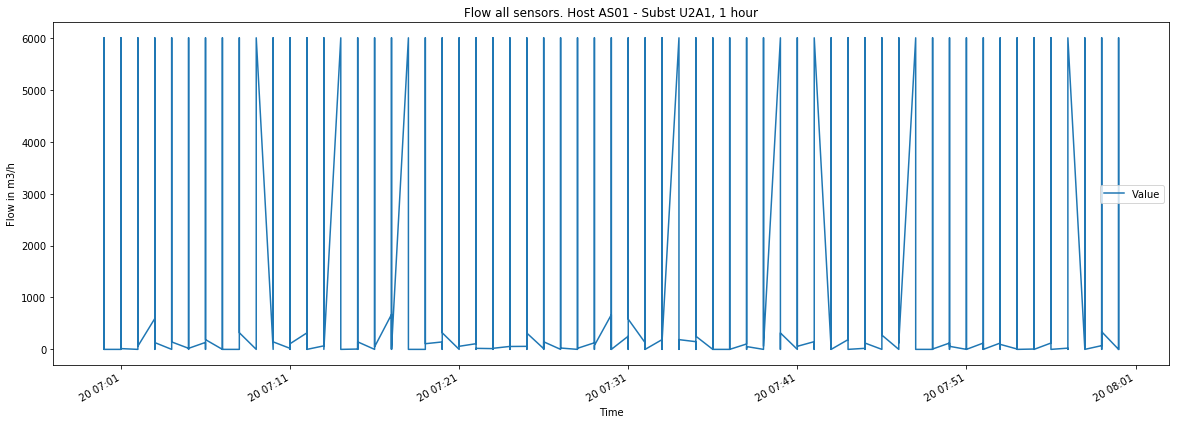

In [46]:
plot_flow(df_result, 'Flow all sensors. Host AS01 - Subst U2A1, 1 hour')

In [47]:
df_test2 = df_result

In [48]:
df_test2_res = df_test2[df_test2['Tag'].str.match('1201')]

In [49]:
df_test2_res.Tag.unique()

array(['1201_8001_06', '1201_8001_08', '1201_8001_08.UT', '1201_8001_09',
       '1201_8001_09.INN'], dtype=object)

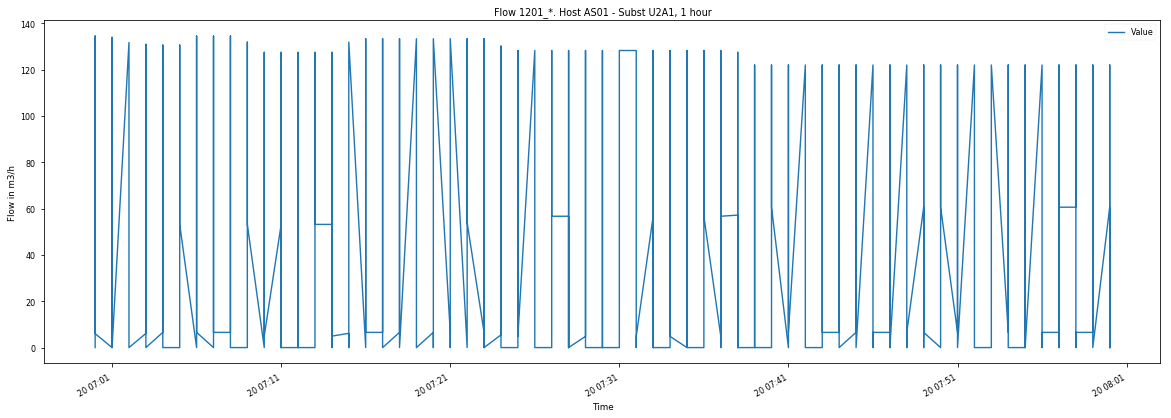

In [50]:
plot_flow(df_test2_res, 'Flow 1201_*. Host AS01 - Subst U2A1, 1 hour')

In [51]:
df_test3 = df_result

In [56]:
df_test3_res = df_test3[df_test3['Tag'].str.match('1201_8001_08')]

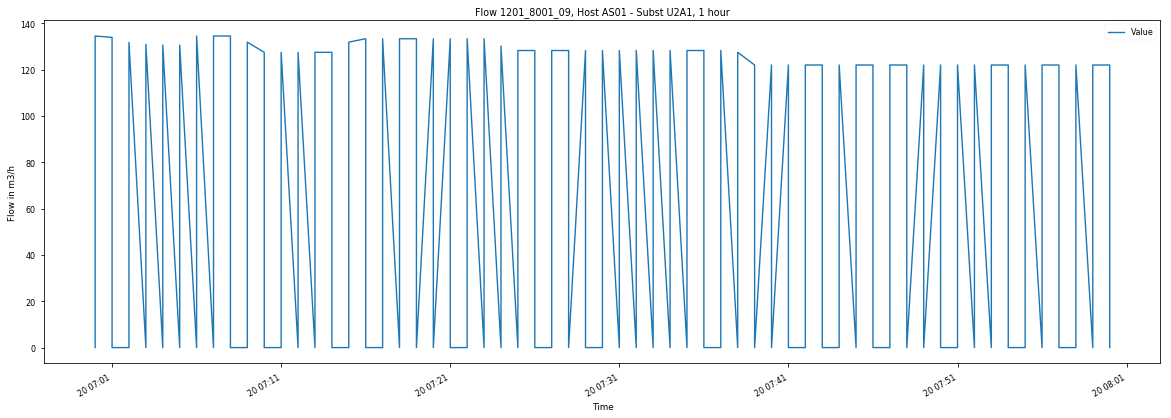

In [57]:
plot_flow(df_test3_res, 'Flow 1201_8001_09, Host AS01 - Subst U2A1, 1 hour')